#### Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 
#### It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

### Intalling prophet package and dependencies

In [1]:
# !pip install pystan fbprophet

### 1) Importing required packages

In [16]:
import pandas as pd
from fbprophet import Prophet

### 2) Reading the dataset

In [3]:
df = pd.read_csv('dataset_for_prophet.csv')

In [4]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [5]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


#### Make Sure that dataset represent a single product or store

In [6]:
print(df.Product.unique())
print(df.Store.unique())

[2667437]
['QLD_CW_ST0203']


In [7]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

#### As our data type for date in int we convet it into a date time data type

In [8]:
df['Year'] = df['Time Date'].apply(lambda x : str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x : str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [9]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


#### Removed redundant columns

In [10]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month','Day'], axis=1, inplace = True)

In [11]:
df.columns=['y','ds']

In [12]:
df.head(2)

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02


### 3) Train Model

In [17]:
m = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m.fit(df)

### 4) Actual Predictions

In [18]:
future = m.make_future_dataframe(periods= 100, freq= 'D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.014918,798.053136,3960.839384,3042.014918,3042.014918,-641.038712,-641.038712,-641.038712,469.792305,...,16.635346,16.635346,16.635346,-1127.466363,-1127.466363,-1127.466363,0.0,0.0,0.0,2400.976206
1,2018-01-02,3042.763893,760.831638,4019.787838,3042.763893,3042.763893,-651.183101,-651.183101,-651.183101,469.792305,...,-11.268085,-11.268085,-11.268085,-1109.707321,-1109.707321,-1109.707321,0.0,0.0,0.0,2391.580792
2,2018-01-03,3043.512868,736.707454,4059.219763,3043.512868,3043.512868,-625.359730,-625.359730,-625.359730,469.792305,...,-4.396566,-4.396566,-4.396566,-1090.755469,-1090.755469,-1090.755469,0.0,0.0,0.0,2418.153138
3,2018-01-04,3044.261843,1036.732393,4145.346727,3044.261843,3044.261843,-578.413553,-578.413553,-578.413553,469.792305,...,22.481778,22.481778,22.481778,-1070.687635,-1070.687635,-1070.687635,0.0,0.0,0.0,2465.848290
4,2018-01-05,3045.010818,923.871076,3980.948495,3045.010818,3045.010818,-614.421907,-614.421907,-614.421907,469.792305,...,-34.580721,-34.580721,-34.580721,-1049.633491,-1049.633491,-1049.633491,0.0,0.0,0.0,2430.588911


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4234.761230,2070.839847,5319.727906,4231.424626,4238.436924,-513.212960,-513.212960,-513.212960,469.792305,...,16.635346,16.635346,16.635346,-999.640611,-999.640611,-999.640611,0.0,0.0,0.0,3721.548270
1176,2021-03-23,4235.830779,2161.735671,5280.015487,4232.411775,4239.551982,-530.656794,-530.656794,-530.656794,469.792305,...,-11.268085,-11.268085,-11.268085,-989.181015,-989.181015,-989.181015,0.0,0.0,0.0,3705.173985
1177,2021-03-24,4236.900329,2086.406821,5340.426845,4233.399090,4240.681613,-516.103571,-516.103571,-516.103571,469.792305,...,-4.396566,-4.396566,-4.396566,-981.499311,-981.499311,-981.499311,0.0,0.0,0.0,3720.796758
1178,2021-03-25,4237.969878,2141.049946,5349.311768,4234.386656,4241.825813,-484.904793,-484.904793,-484.904793,469.792305,...,22.481778,22.481778,22.481778,-977.178875,-977.178875,-977.178875,0.0,0.0,0.0,3753.065085
1179,2021-03-26,4239.039427,2038.350517,5292.672989,4235.380277,4242.952416,-541.506539,-541.506539,-541.506539,469.792305,...,-34.580721,-34.580721,-34.580721,-976.718123,-976.718123,-976.718123,0.0,0.0,0.0,3697.532888


In [21]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2400.976206
1,2018-01-02,2391.580792
2,2018-01-03,2418.153138
3,2018-01-04,2465.848290
4,2018-01-05,2430.588911
...,...,...
1175,2021-03-22,3721.548270
1176,2021-03-23,3705.173985
1177,2021-03-24,3720.796758
1178,2021-03-25,3753.065085


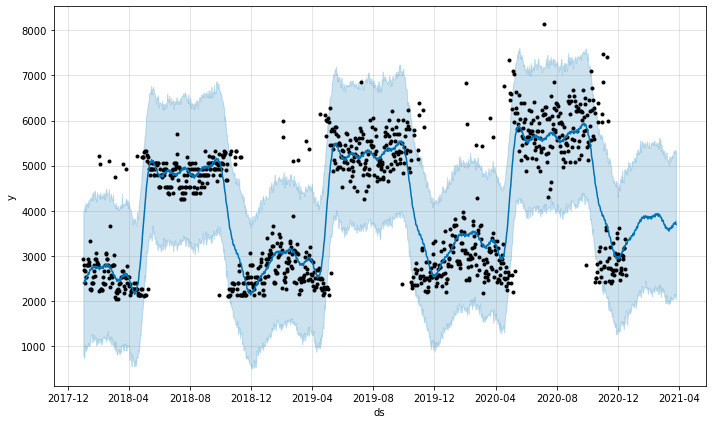

In [22]:
plot_1 = m.plot(forecast)

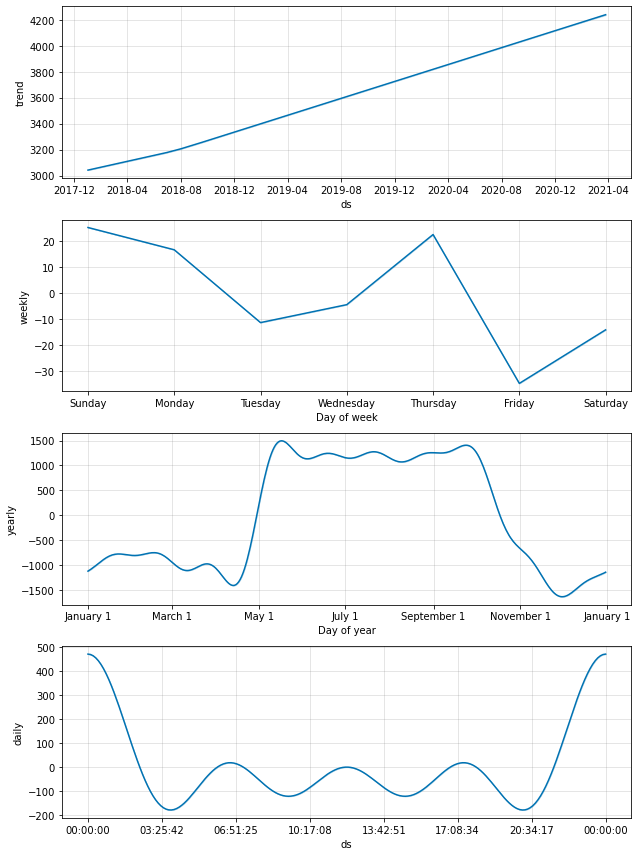

In [23]:
plot_2 = m.plot_components(forecast)